In [1]:
library(TSA)
library(mgcv)
install.packages("nbconvertR")
library(nbconvertR)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nbconvertR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\RtmpgBplAy\downloaded_packages


Warning message:
"package 'nbconvertR' was built under R version 3.6.2"

In [2]:
EGD = read.csv("EGD.csv",header=T)
head(EGD, n=5)

Year,Month,Day,Volume
2010,1,1,135
2010,1,2,163
2010,1,3,139
2010,1,4,139
2010,1,5,122


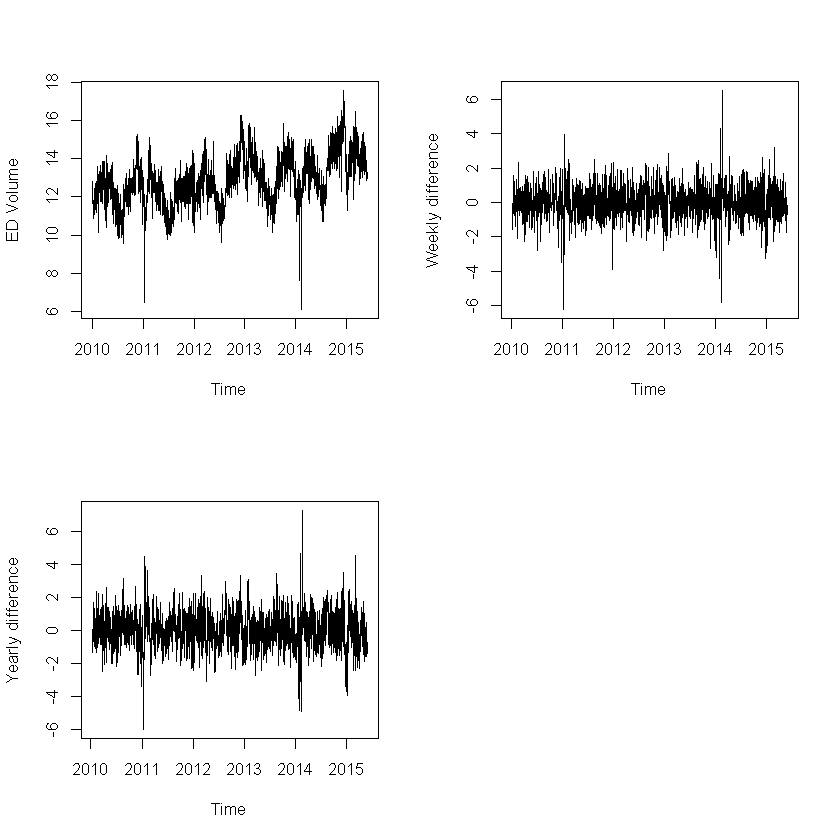

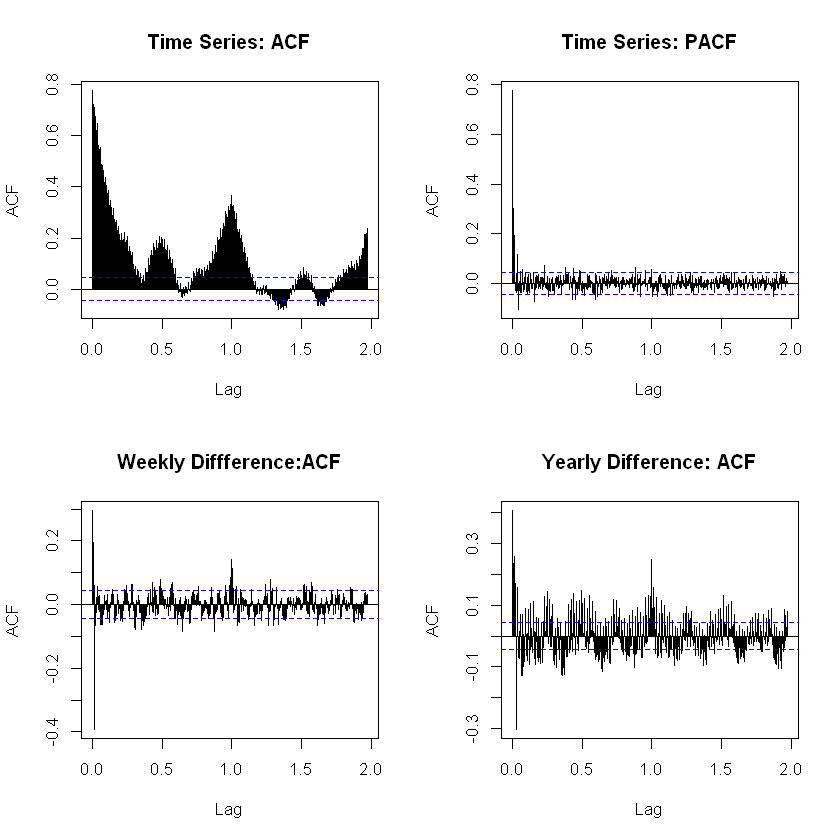

In [3]:
Volume.tr = sqrt(EGD$Volume+3/8)

volume.ts = ts(Volume.tr,start=c(2010,1,1),frequency=365.25)
dvolume7=diff(volume.ts,7) # weekly
dvolume12=diff(volume.ts,12) # monthly (annual)

#plot time series and difference processes
par(mfrow=c(2,2))
ts.plot(volume.ts,ylab="ED Volume")
ts.plot(dvolume7,ylab="Weekly difference")
ts.plot(dvolume12,ylab="Yearly difference")

par(mfrow=c(2,2))
acf(volume.ts, main='Time Series: ACF',lag.max=360*2)
acf(volume.ts,type="partial", main='Time Series: PACF',lag.max=360*2)
acf(dvolume7 , main='Weekly Diffference:ACF',lag.max=360*2)
acf(dvolume12, main='Yearly Difference: ACF',lag.max=360*2)


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

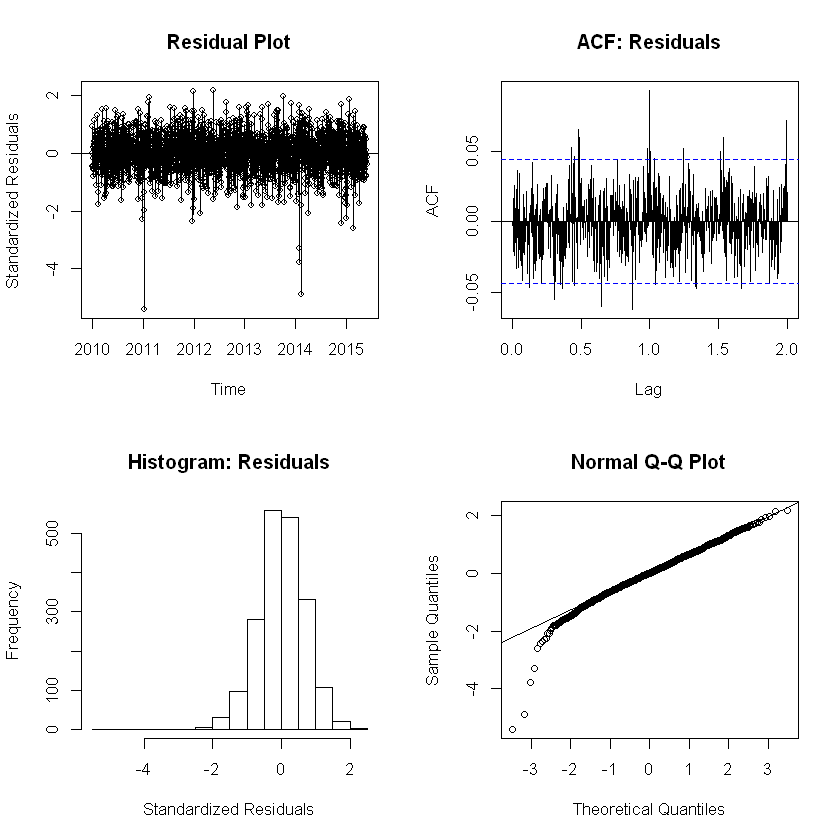

In [21]:
## Model Fitting ARIMA(5,1,5)+seasonal ARMA(1,1)
mod = arima(volume.ts, order = c(5,1,5),seasonal = list(order = c(1,0,1),period=7),method = "ML")

par(mfrow=c(2,2))
# residual analysis
plot(resid(mod), ylab='Standardized Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(resid(mod),lag.max=365*2,main="ACF: Residuals")
hist(resid(mod),xlab='Standardized Residuals',main='Histogram: Residuals')
qqnorm(resid(mod))
qqline(resid(mod))

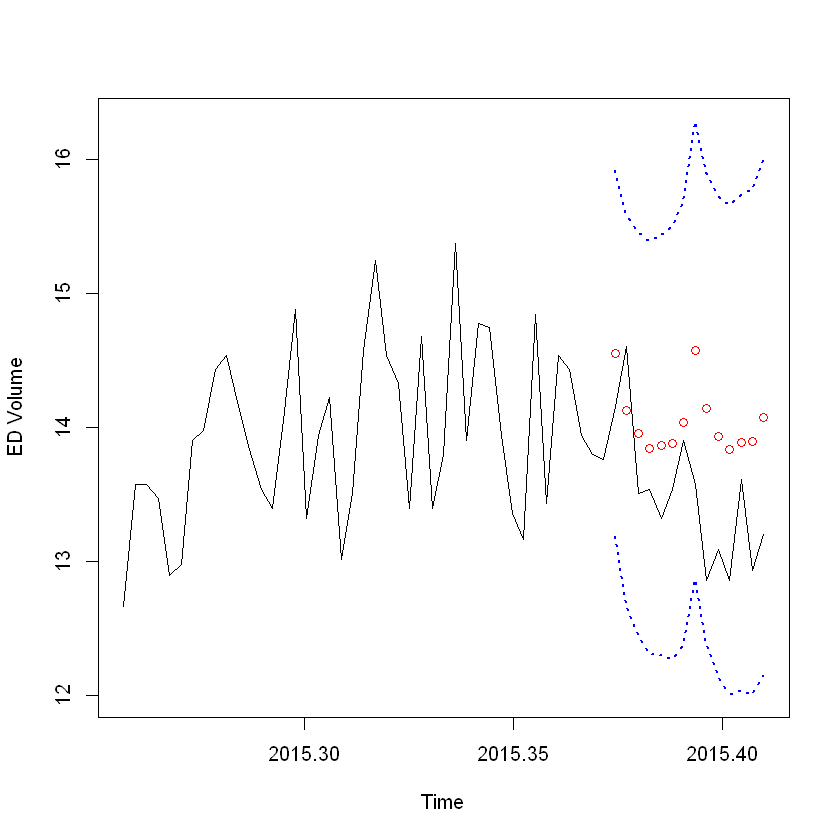

In [4]:
## Forecasting with ARIMA: 2 Weeks Ahead
n = length(volume.ts)
nfit = n-14
outvol = arima(volume.ts[1:nfit], order = c(5,1,5),seasonal = list(order = c(1,0,1),period=7),method = "ML",optim.control=list(maxit=1000))
out_pred = predict(outvol,n.ahead=14)

timevol=time(volume.ts)
ubound = out_pred$pred+1.96*out_pred$se
lbound = out_pred$pred-1.96*out_pred$se
ymin = min(lbound)
ymax = max(ubound)
plot(timevol[(n-56):n],volume.ts[(n-56):n],type="l", ylim=c(ymin,ymax), xlab="Time", ylab="ED Volume")
points(timevol[(nfit+1):n],out_pred$pred,col="red")
lines(timevol[(nfit+1):n],ubound,lty=3,lwd= 2, col="blue")
lines(timevol[(nfit+1):n],lbound,lty=3,lwd= 2, col="blue")